# BENG 469 Lab (scATAC-seq)

## This script is for extracting insert-size distributions

One of the new quality control steps that used in this manuscript is scoring of individual cells for evidence of a banded insert size distribution that would be indicative of a high-quality ATAC-seq library. We do this by first extracting an insert size distribution for each cell.

<img src="img/fig1d.PNG">
<img src="img/ATAC-seq.png">

### 1. Load packages

In [1]:
import pysam
import collections
import matplotlib.pyplot as plt

### 2. Download data

- The first step is to extract a histogram of insert sizes across all reads associated with each cell. The input to this script is a BAM file of the aligned reads.

- Raw data can be download from https://atlas.gs.washington.edu/mouse-atac/
- In this lab, we are using downsampled data

In [2]:
# This line is optional
#!rm Cerebellum_62216.bam
#!wget http://krishna.gs.washington.edu/content/members/mouse_ATAC_atlas_website/bams/Cerebellum_62216.bam

In [88]:
# Download downsampled data
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bubrwts2I_J-woZTVwyzlkIuyMX9_3rL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bubrwts2I_J-woZTVwyzlkIuyMX9_3rL" -O Cerebellum_62216.bam && rm -rf /tmp/cookies.txt

--2021-02-21 16:58:13--  https://docs.google.com/uc?export=download&confirm=FwZj&id=1bubrwts2I_J-woZTVwyzlkIuyMX9_3rL
Resolving docs.google.com (docs.google.com)... 142.250.64.110, 2607:f8b0:4006:807::200e
Connecting to docs.google.com (docs.google.com)|142.250.64.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-20-docs.googleusercontent.com/docs/securesc/8jklbc2rbbe83jqcrl125hdjp77hq6e1/ei9njbeupg6lf4hvop4i5dpjbcpr652u/1613944650000/15445346426572989241/14420805231375242145Z/1bubrwts2I_J-woZTVwyzlkIuyMX9_3rL?e=download [following]
--2021-02-21 16:58:13--  https://doc-08-20-docs.googleusercontent.com/docs/securesc/8jklbc2rbbe83jqcrl125hdjp77hq6e1/ei9njbeupg6lf4hvop4i5dpjbcpr652u/1613944650000/15445346426572989241/14420805231375242145Z/1bubrwts2I_J-woZTVwyzlkIuyMX9_3rL?e=download
Resolving doc-08-20-docs.googleusercontent.com (doc-08-20-docs.googleusercontent.com)... 172.217.165.129, 2607:f8b0:4006:808::2001
Connecting to doc-

### 3. Load data (BAM file)
A BAM file (*.bam) is the compressed binary version of a SAM file that is used to represent aligned sequences. (https://samtools.github.io/hts-specs/SAMv1.pdf)

<img src="img/BAM file.png">

In [3]:
bam_file = 'Cerebellum_62216.bam'

Example bam file output:

<img src="img/bam_read_n1.png">

In [4]:
sam_file = pysam.Samfile(bam_file, "rb")

In [5]:
# Let's check the fragment length of first read in the bam file

for alignment in sam_file:
    print('QNAME is:', alignment.query_name)
    print('\nThe fragment length is: ', abs(alignment.tlen))
    break

sam_file.close()

QNAME is: TAATGCGCTATTAGACTTTTATGACCAACCTATCCT:623946703#0000

The fragment length is:  75


In [6]:
sam_file = pysam.Samfile(bam_file, "rb")

insert_sizes = {}

read_names = set()

for alignment in sam_file:
    # Don't count R1 and R2 twice
    if alignment.query_name in read_names:
        continue
    else:
        read_names.add(alignment.query_name)

    # Get the insert size
    insert_size = abs(alignment.tlen)

    # Discount inferred insert sizes over 1000
    if insert_size >= 1000:
        continue

    # Track stats (read names come in the format cellid:other_text)
    cell_name = alignment.query_name.split(':')[0]

    cell_insert_size_distribution = insert_sizes.get(cell_name, collections.Counter())

    cell_insert_size_distribution[insert_size] += 1
    insert_sizes[cell_name] = cell_insert_size_distribution

In [7]:
cell = list(insert_sizes.keys())[2]
print(cell)

TAATGCGCTTGGCAAGCCCAATGAGTCCCCTATCCT


In [8]:
counts = insert_sizes[cell]
print(counts)

Counter({177: 55, 176: 50, 187: 44, 152: 44, 167: 44, 175: 42, 151: 42, 172: 42, 169: 42, 173: 41, 186: 39, 178: 39, 168: 38, 171: 36, 179: 36, 166: 35, 149: 34, 181: 34, 160: 33, 185: 33, 150: 31, 165: 30, 174: 30, 180: 30, 183: 30, 194: 30, 189: 30, 170: 29, 182: 28, 197: 28, 139: 27, 138: 27, 188: 27, 153: 27, 202: 26, 201: 26, 161: 26, 190: 25, 162: 25, 207: 25, 200: 24, 205: 23, 159: 23, 51: 23, 54: 23, 217: 22, 164: 22, 198: 22, 63: 21, 163: 21, 184: 21, 196: 21, 137: 21, 203: 21, 214: 21, 148: 20, 58: 20, 221: 20, 195: 20, 62: 20, 140: 20, 72: 20, 192: 19, 199: 19, 49: 19, 158: 19, 206: 19, 208: 18, 218: 18, 61: 18, 157: 18, 209: 18, 46: 18, 64: 17, 55: 17, 57: 17, 222: 17, 67: 17, 191: 17, 70: 17, 56: 17, 216: 17, 213: 17, 44: 17, 212: 17, 78: 17, 210: 16, 193: 16, 75: 16, 74: 16, 211: 15, 225: 15, 219: 15, 50: 15, 66: 15, 68: 15, 321: 15, 85: 15, 155: 14, 227: 14, 204: 14, 215: 14, 92: 14, 60: 14, 83: 14, 45: 13, 237: 13, 84: 13, 226: 13, 314: 13, 224: 13, 65: 13, 154: 13, 47:

<BarContainer object of 728 artists>

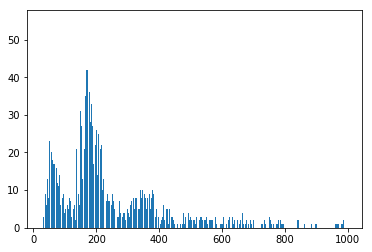

In [9]:
plt.bar(counts.keys(), counts.values())
# Let's check another cell, e.g. cell 3

In [68]:
#!samtools view -bs 42.1 Cerebellum_62216.bam > Cerebellum_subsampled.bam

In [14]:
#%load_ext watermark

#%watermark -v -m -p wget,pysam,collections,matplotlib

#print (" ")
#%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.3
IPython version      : 7.5.0

wget       : not installed
pysam      : 0.15.2
collections: unknown
matplotlib : 3.0.3

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1062.33.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

 
Last updated: Sun Feb 21 2021 15:00:32EST

